## 0. 数据导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv', header=None, sep='\s+')    # 没有列头, 分割符为任意空字符
columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","PRICE"]
df.columns = columns                                        # 列头重命名
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe().T                        # 查看基本统计量

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## 1. 数据预处理
包括对特征进行标准化，以及分割训练测试集

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error                                                              # 均方误差函数

X_ori, y_ori = df.iloc[:,:13], df.iloc[:,13:]
X_train, X_test, y_train, y_test = train_test_split(X_ori, y_ori, test_size=0.25, random_state=1)            # 调包分割训练集测试集
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)                                                                 # 调包进行每一列的标准化
X_test_std = scaler.transform(X_test)

print(f"X_ori: {X_ori.shape}, y_ori: {y_ori.shape}")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train_std: {X_train_std.shape}, X_test_std: {X_test_std.shape}")

X_ori: (117, 2), y_ori: (117, 0)
X_train: (87, 2), X_test: (30, 2), y_train: (87, 0), y_test: (30, 0)
X_train_std: (87, 2), X_test_std: (30, 2)


## 2. Ridge regression

In [5]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge(alpha=0.5)
model_Ridge.fit(X_train_std, y_train)
y_pred_train_Ridge = model_Ridge.predict(X_train_std)
mse_train = mean_squared_error(y_train, y_pred_train_Ridge)
y_pred_test_Ridge = model_Ridge.predict(X_test_std)
mse_test = mean_squared_error(y_test, y_pred_test_Ridge)

print(f"train mse: {mse_train:.2f}, test mse: {mse_test:.2f}")

train mse: 22.48, test mse: 21.90


In [6]:
print(f"w={model_Ridge.coef_}")
print(f"b={model_Ridge.intercept_}")

w=[[-1.06529961  1.32518886  0.24624079  0.66760443 -2.47705108  1.98317048
   0.188086   -3.12079188  2.61499643 -1.75783793 -2.12515378  0.56218556
  -4.02074809]]
b=[22.34459103]


In [7]:
alphas = np.linspace(0.01, 10, 20)
w_2s = []
for alpha in alphas:                                                # 考察不同 alpha 值对模型参数、性能的影响
    model_Ridge = Ridge(alpha=alpha)
    model_Ridge.fit(X_train_std, y_train)
    y_pred_train_Ridge = model_Ridge.predict(X_train_std)
    mse_train = mean_squared_error(y_train, y_pred_train_Ridge)
    y_pred_test_Ridge = model_Ridge.predict(X_test_std)
    mse_test = mean_squared_error(y_test, y_pred_test_Ridge)
    w_2 = (model_Ridge.coef_ * model_Ridge.coef_).sum()             # 系数的 L2 范数（模的平方）之和
    w_2s.append(w_2)
    print(f"alpha={alpha:.2f}, w_2={w_2:.2f}, mse_train={mse_train:.2f}, mse_test={mse_test:.2f}")

alpha=0.01, w_2=54.99, mse_train=22.48, mse_test=21.90
alpha=0.54, w_2=54.11, mse_train=22.48, mse_test=21.90
alpha=1.06, w_2=53.27, mse_train=22.48, mse_test=21.89
alpha=1.59, w_2=52.47, mse_train=22.48, mse_test=21.90
alpha=2.11, w_2=51.71, mse_train=22.49, mse_test=21.90
alpha=2.64, w_2=50.99, mse_train=22.49, mse_test=21.90
alpha=3.16, w_2=50.29, mse_train=22.50, mse_test=21.91
alpha=3.69, w_2=49.63, mse_train=22.50, mse_test=21.91
alpha=4.22, w_2=48.99, mse_train=22.51, mse_test=21.92
alpha=4.74, w_2=48.38, mse_train=22.52, mse_test=21.93
alpha=5.27, w_2=47.80, mse_train=22.52, mse_test=21.93
alpha=5.79, w_2=47.23, mse_train=22.53, mse_test=21.94
alpha=6.32, w_2=46.69, mse_train=22.54, mse_test=21.95
alpha=6.85, w_2=46.16, mse_train=22.55, mse_test=21.96
alpha=7.37, w_2=45.66, mse_train=22.56, mse_test=21.98
alpha=7.90, w_2=45.17, mse_train=22.57, mse_test=21.99
alpha=8.42, w_2=44.70, mse_train=22.58, mse_test=22.00
alpha=8.95, w_2=44.24, mse_train=22.59, mse_test=22.01
alpha=9.47

Text(0, 0.5, 'w_2')

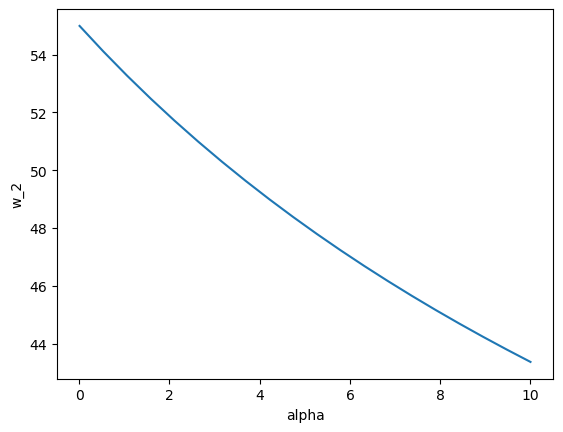

In [8]:
plt.plot(alphas, w_2s)
plt.xlabel('alpha')
plt.ylabel('w_2')

## 2. Lasso regression

In [9]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso(alpha=0.5)
model_Lasso.fit(X_train_std, y_train)
y_pred_train_Lasso = model_Lasso.predict(X_train_std)
mse_train = mean_squared_error(y_train, y_pred_train_Lasso)
y_pred_test_Lasso = model_Lasso.predict(X_test_std)
mse_test = mean_squared_error(y_test, y_pred_test_Lasso)

print(f"train mse: {mse_train:.2f}, test mse: {mse_test:.2f}")

train mse: 26.91, test mse: 28.60


In [10]:
print(f"w={model_Lasso.coef_}")
print(f"b={model_Lasso.intercept_}")

w=[-0.1782935   0.         -0.          0.36409179 -0.10063016  2.25265362
 -0.         -0.01392629 -0.         -0.         -1.60755398  0.23553052
 -3.88654948]
b=[22.34459103]


In [11]:
alphas = np.linspace(0.01, 10, 20)
w_1s = []
for alpha in alphas:                                                # 考察不同 alpha 值对模型参数、性能的影响
    model_Lasso = Lasso(alpha=alpha)
    model_Lasso.fit(X_train_std, y_train)
    y_pred_train_Lasso = model_Lasso.predict(X_train_std)
    mse_train = mean_squared_error(y_train, y_pred_train_Lasso)
    y_pred_test_Lasso = model_Lasso.predict(X_test_std)
    mse_test = mean_squared_error(y_test, y_pred_test_Lasso)
    w_1 = np.abs(model_Lasso.coef_).sum()             # 系数的 L1 范数（模）之和
    w_1s.append(w_1)
    print(f"alpha={alpha:.2f}, w_1={w_1:.2f}, mse_train={mse_train:.2f}, mse_test={mse_test:.2f}")

alpha=0.01, w_1=21.55, mse_train=22.49, mse_test=21.92
alpha=0.54, w_1=8.50, mse_train=27.05, mse_test=28.89
alpha=1.06, w_1=7.12, mse_train=29.17, mse_test=33.17
alpha=1.59, w_1=6.27, mse_train=31.41, mse_test=37.36
alpha=2.11, w_1=5.43, mse_train=34.53, mse_test=42.50
alpha=2.64, w_1=4.58, mse_train=38.55, mse_test=48.60
alpha=3.16, w_1=3.78, mse_train=43.19, mse_test=55.39
alpha=3.69, w_1=3.13, mse_train=47.67, mse_test=61.98
alpha=4.22, w_1=2.48, mse_train=52.83, mse_test=69.28
alpha=4.74, w_1=1.85, mse_train=58.47, mse_test=76.83
alpha=5.27, w_1=1.32, mse_train=63.73, mse_test=82.70
alpha=5.79, w_1=0.79, mse_train=69.55, mse_test=89.07
alpha=6.32, w_1=0.27, mse_train=75.92, mse_test=95.93
alpha=6.85, w_1=0.00, mse_train=79.37, mse_test=99.62
alpha=7.37, w_1=0.00, mse_train=79.37, mse_test=99.62
alpha=7.90, w_1=0.00, mse_train=79.37, mse_test=99.62
alpha=8.42, w_1=0.00, mse_train=79.37, mse_test=99.62
alpha=8.95, w_1=0.00, mse_train=79.37, mse_test=99.62
alpha=9.47, w_1=0.00, mse_t

Text(0, 0.5, 'w_1')

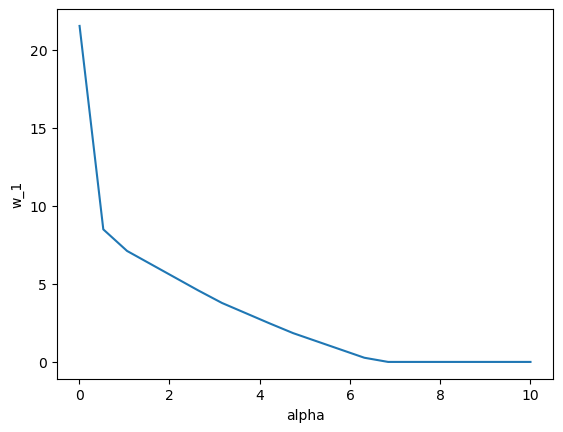

In [12]:
plt.plot(alphas, w_1s)
plt.xlabel('alpha')
plt.ylabel('w_1')

## 3. Decision tree regression

In [25]:
from sklearn import tree

model_DT = tree.DecisionTreeRegressor(max_depth=3)
model_DT.fit(X_train_std, y_train)
y_pred_train_DT = model_DT.predict(X_train_std)
mse_train = mean_squared_error(y_train, y_pred_train_DT)
y_pred_test_DT = model_DT.predict(X_test_std)
mse_test = mean_squared_error(y_test, y_pred_test_DT)

print(f"train mse: {mse_train:.2f}, test mse: {mse_test:.2f}")

train mse: 16.26, test mse: 29.71


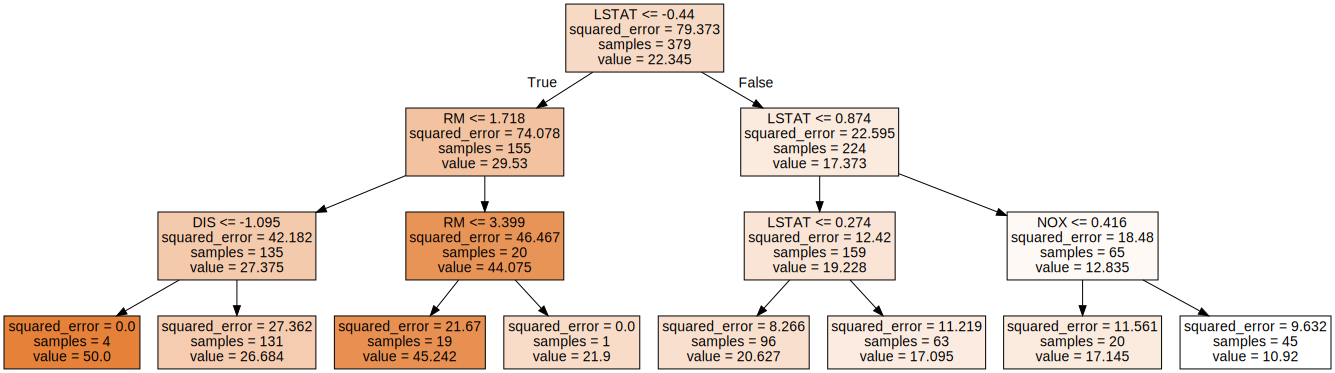

In [26]:
import graphviz                                                                         # DOT 格式文档的可视化库

dot_data = tree.export_graphviz(model_DT, feature_names=columns[:-1], filled=True)      # 决策树可视化
graph = graphviz.Source(dot_data)
graph

In [50]:
depths = np.arange(1, 10)
mse_train_list = []
mse_test_list = []
for depth in depths:                                                # 考察不同深度对模型性能的影响
    model_DT = tree.DecisionTreeRegressor(max_depth=depth)
    model_DT.fit(X_train_std, y_train)
    y_pred_train_DT = model_DT.predict(X_train_std)
    mse_train = mean_squared_error(y_train, y_pred_train_DT)
    y_pred_test_DT = model_DT.predict(X_test_std)
    mse_test = mean_squared_error(y_test, y_pred_test_DT)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

In [46]:
print(f"mse_train={mse_train_list[4]:.2f},mse_test={mse_test_list[4]:.2f}")

mse_train=6.31,mse_test=12.24


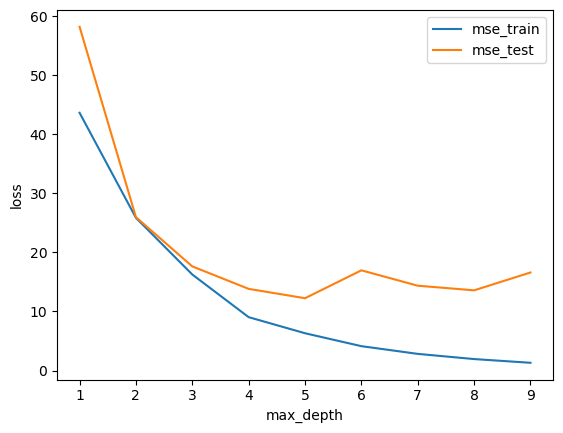

In [51]:
plt.plot(depths, mse_train_list, label='mse_train')
plt.plot(depths, mse_test_list, label='mse_test')
plt.xlabel('max_depth')
plt.ylabel('loss')
plt.legend()

## 4. SVR

In [13]:
from sklearn import svm

scores = {}

In [35]:
model_SVM = svm.SVR(kernel='linear', C=100)                            # 线性核函数, C是正则化项, C越大正则化越弱。
model_SVM.fit(X_train_std, y_train.values.ravel())              # svm.fit 要求 y 是 1darray
y_pred_train_SVM = model_SVM.predict(X_train_std)
mse_train = mean_squared_error(y_train, y_pred_train_SVM)
y_pred_test_SVM = model_SVM.predict(X_test_std)
mse_test = mean_squared_error(y_test, y_pred_test_SVM)
scores['linear'] = (mse_train, mse_test)

In [36]:
print(f"w={model_SVM.coef_}")
print(f"b={model_SVM.intercept_}")

w=[[-1.36588194  0.90078073  0.12878347  0.39875987 -1.55266415  3.18885159
  -0.632851   -2.11612812  1.9646838  -1.785257   -1.75014524  0.80011674
  -2.07817398]]
b=[21.50635058]


In [37]:
model_SVM = svm.SVR(kernel='poly', degree=3, C=30)                            # 多项式核函数
model_SVM.fit(X_train_std, y_train.values.ravel())
y_pred_train_SVM = model_SVM.predict(X_train_std)
mse_train = mean_squared_error(y_train, y_pred_train_SVM)
y_pred_test_SVM = model_SVM.predict(X_test_std)
mse_test = mean_squared_error(y_test, y_pred_test_SVM)
scores['poly'] = (mse_train, mse_test)

In [38]:
model_SVM = svm.SVR(kernel='rbf',C=50)                            # 高斯核函数
model_SVM.fit(X_train_std, y_train.values.ravel())
y_pred_train_SVM = model_SVM.predict(X_train_std)
mse_train = mean_squared_error(y_train, y_pred_train_SVM)
y_pred_test_SVM = model_SVM.predict(X_test_std)
mse_test = mean_squared_error(y_test, y_pred_test_SVM)
scores['rbf'] = (mse_train, mse_test)

In [39]:
for key in scores:
    print(f"{key}: mse_train={scores[key][0]:.2f}, mse_test={scores[key][1]:.2f}")

linear: mse_train=25.27, mse_test=21.96
poly: mse_train=6.79, mse_test=13.42
rbf: mse_train=4.96, mse_test=7.06


## 5. Neural Network

In [40]:
import torch

X_train_std_tensor = torch.tensor(X_train_std)              # 数据从 ndarray 和 dataframe 转成 tensor
y_train_tensor = torch.tensor(y_train.values)
X_test_std_tensor = torch.tensor(X_test_std)
y_test_tensor = torch.tensor(y_test.values)

print(X_train_std_tensor.shape)
print(y_train_tensor.shape)

torch.Size([379, 13])
torch.Size([379, 1])


In [41]:
model_NN = torch.nn.Sequential(
    torch.nn.Linear(13, 256, dtype=torch.float64),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 64, dtype=torch.float64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 16, dtype=torch.float64),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 8, dtype=torch.float64),
    torch.nn.ReLU(),
    torch.nn.Linear(8, 1, dtype=torch.float64)
)                                                               # 构建一个 4 隐藏层的前馈神经网络

loss_fn = torch.nn.MSELoss(reduction='mean')                    # 均方误差函数
optimizer = torch.optim.SGD(model_NN.parameters(), lr=1e-3)     # 梯度下降优化器(使用batch gradient descent)
t_list = []
loss_train_list = []
loss_test_list = []
def train_model(model, X, y, X_test, y_test, loss_fn, optimizer, epoch):
    for t in range(epoch):
        y_pred_train_NN = model(X)                              # 每一轮都对所有样本计算预测值
        loss_train = loss_fn(y_pred_train_NN, y)                # 和 loss
        optimizer.zero_grad()                                   # 反向传播前，清零累计的梯度
        loss_train.backward()                                   # 反向传播计算参数梯度
        optimizer.step()                                        # 执行一步迭代
        t_list.append(t)
        loss_train_list.append(loss_train.item())               # 记录在训练集上的 loss
        
        with torch.no_grad():
            y_pred_test_NN = model(X_test)
            loss_test = loss_fn(y_pred_test_NN, y_test)
            loss_test_list.append(loss_test.item())             # 记录在测试集上的 loss

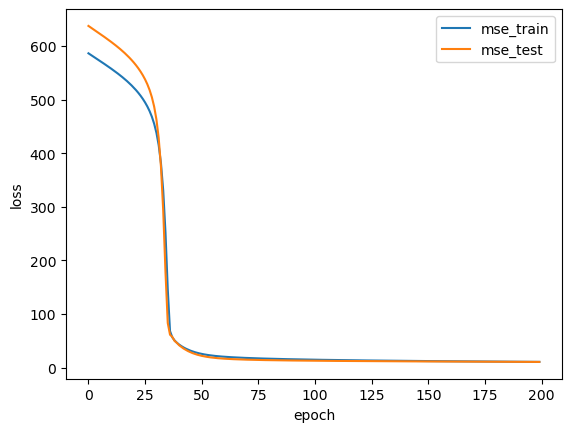

In [42]:
train_model(model_NN, X_train_std_tensor, y_train_tensor, X_test_std_tensor, y_test_tensor, loss_fn, optimizer, 200)

plt.plot(t_list, loss_train_list, label='mse_train')
plt.plot(t_list, loss_test_list, label='mse_test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [52]:
print(f"mse_train={loss_train_list[-1]:.2f}, mse_test={loss_test_list[-1]:.2f}")

mse_train=10.70, mse_test=10.62


## 6. Bonus

In [17]:
df = pd.read_csv('housing_bj.csv')          # 从安居客网上整理下来的数据集,见https://github.com/megrezbunny/2023.9_ML
df.head(20)

,month,price
0,1,40428
1,2,40592
2,3,40554
3,4,39812
4,5,39429
5,6,39378
6,7,37716
7,8,37323
8,9,36722
9,10,36994


In [18]:
df.describe()

,month,price
count,117.000000,117.000000
mean,59.000000,53437.008547
std,33.919021,8548.627271
min,1.000000,36722.000000
25%,30.000000,44854.000000
50%,59.000000,58150.000000
75%,88.000000,59376.000000
max,117.000000,61613.000000


Text(0, 0.5, 'price')

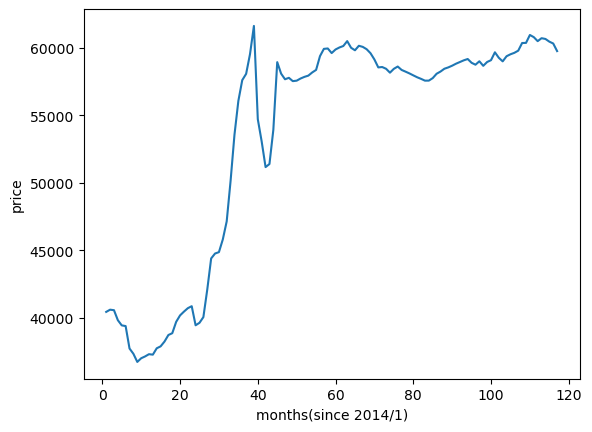

In [19]:
plt.plot(df['month'], df['price'])
plt.xlabel('months(since 2014/1)')
plt.ylabel('price')

In [20]:
X_train, y_train = df.iloc[:,:1], df.iloc[:,1:] / 10000
X_pred = pd.DataFrame(np.array([[i] for i in range(1,130)]), columns=['month'])

mse_train=0.02953423000821051


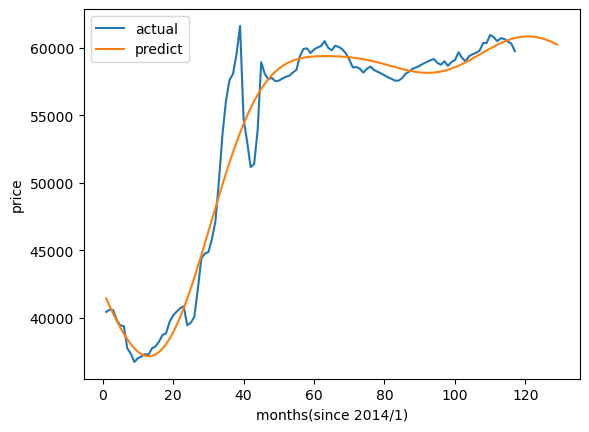

In [21]:
model_SVM = svm.SVR(kernel='rbf',C=50)
model_SVM.fit(X_train, y_train.values.ravel())
y_pred_train = model_SVM.predict(X_train)
y_pred = model_SVM.predict(X_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"mse_train={mse_train}")

plt.plot(X_train, y_train*10000, label='actual')
plt.plot(X_pred, y_pred*10000, label='predict')
plt.xlabel('months(since 2014/1)')
plt.ylabel('price')
plt.legend()

In [28]:
y_next = y_pred[117:]
for price in y_next:
    print(f"{price * 10000:.0f},",end='')

60768,60808,60830,60834,60820,60787,60737,60669,60584,60482,60364,60232,